In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

import numpy as np

In [19]:
#Function to load data

# Fonction pour extraire le nom de l'expérience à partir du nom de fichier
def extract_experiment_name(file_name, pattern):
    # Expression régulière pour rechercher le motif "P-V 1V_1#1" dans le nom de fichier
    match = re.search(pattern, file_name)
    if match:
        return match.group()
    else:
        return None

def load_data(data_folder, chip_name, placement, size, graph_type):
    # Liste des dossiers dans le dossier data_folder
    date_folders = os.listdir(data_folder)
    
    # Parcours des dossiers de date
    for date_folder in date_folders:
        # Chemin complet du dossier de date
        date_folder_path = os.path.join(data_folder, date_folder)
        
        # # Liste des dossiers de chips dans le dossier de date
        # chip_folders = os.listdir(date_folder_path)

        # Liste des dossiers de chips dans le dossier de date
        chip_folders = [folder for folder in os.listdir(date_folder_path) if os.path.isdir(os.path.join(date_folder_path, folder))]
        
        
        # Parcours des dossiers de chips
        for chip_folder in chip_folders:
            # Vérification si le nom de la chip correspond
            if chip_name in chip_folder:
                # Chemin complet du dossier de la chip
                chip_folder_path = os.path.join(date_folder_path, chip_folder)
                
                # Liste des fichiers xls dans le dossier de la chip
                xls_files = [file for file in os.listdir(chip_folder_path) if file.endswith('.xls')]
                
                # Parcours des fichiers xls
                for xls_file in xls_files:
                    # Séparation du nom du fichier
                    file_parts = xls_file.split('_')
                    file_placement, file_size, end = file_parts[0], file_parts[1], '_'.join(file_parts[4:])
                    file_graph_type = extract_experiment_name(xls_file, graph_type)
                    #file_graph_type = file_graph_type.split('.')[0]
                    
                    # Vérification si les critères de recherche correspondent
                    if file_placement == placement and file_size == size and file_graph_type == graph_type:
                        # Chargement des données xls dans une DataFrame
                        xls_path = os.path.join(chip_folder_path, xls_file)
                        data = pd.read_excel(xls_path)
                        return data

In [20]:
temperature = ["600", "500", "450"]
tool = ["DP", "SP"]
time = ["20", "120", "240"]

class Chip:
    def __init__(self, name, file, experience, size, tool=None, temp=None, time=None):
        self.name = name
        self.file = file
        self.experience = experience
        self.size = size
        self.tool = tool
        self.temp = temp
        self.time = time

class Result:
    def __init__(self, res_leak, res_pol, res_co, tool=None, temp=None, time=None, name=None):
        self.res_leak = []  # Initialisez une liste vide pour res_leak
        self.res_pol = []   # Initialisez une liste vide pour res_pol
        self.res_co = []
        self.res_leak.append(res_leak)  # Ajoutez res_leak à la liste res_leak
        self.res_pol.append(res_pol)    # Ajoutez res_pol à la liste res_pol
        self.res_co.append(res_co)
        self.tool = tool
        self.temp = temp
        self.time = time
        self.name = name

# list_exp = ["P-V 1V_1#1", "P-V 1V_2#1", "P-V 2V_1#1", "P-V 2V_2#1", "P-V 3V_1#1", "P-V 3V_2#1", 
#                       "P-V 4V_1#1", "P-V 4V_2#1", "P-V 3V neg_1#1", "P-V 3V neg_1#1", "PUND 5V_1#1", "PUND 5V neg_1#1", "CV 3V_1#1", "IV 3V_1#1"]

list_exp = ["P-V 4V_1#1", "IV 3V_1#1"]

size = ["50", "100", "150", "200", "500"]

In [21]:
#Sort excel file
# Chemin du fichier Excel
chemin_fichier = "C:\Documents\EPFL\MA4\Projet_de_semestre\log_areatest.xlsx"
data_folder = "C:\Documents\EPFL\MA4\Projet_de_semestre\Code\Real_data"
output_folder = "C:\Documents\EPFL\MA4\Projet_de_semestre\Code\Result"

# Lire le fichier Excel
df = pd.read_excel(chemin_fichier)

# Liste de tous les noms de chips (sans le préfixe "at_")
chips_all = df["sample ID"].str[3:].tolist()

# Liste de chaque nom de chip en fonction du type
chips_DP = df[df["Sputtering method"] == "DP"]["sample ID"].str[3:].tolist()
chips_SP = df[df["Sputtering method"] == "SP"]["sample ID"].str[3:].tolist()
chips_600 = df[df["Annealing temperature"] == 600]["sample ID"].str[3:].tolist()
chips_500 = df[df["Annealing temperature"] == 500]["sample ID"].str[3:].tolist()
chips_450 = df[df["Annealing temperature"] == 450]["sample ID"].str[3:].tolist()
chips_20 = df[df["Annealing time"] == 20]["sample ID"].str[3:].tolist()
chips_120 = df[df["Annealing time"] == 120]["sample ID"].str[3:].tolist()
chips_240 = df[df["Annealing time"] == 240]["sample ID"].str[3:].tolist()

In [22]:
#Function to tri
def found_tool (chip):
    if chip in chips_DP:
        return "DP"
    if chip in chips_SP:
        return "SP"
    print(f"something_wrong with {chip}")
    return "WRONG"

def found_temp (chip):
    if chip in chips_600:
        return "600"
    if chip in chips_500:
        return "500"
    if chip in chips_450:
        return "450"
    print(f"something_wrong with {chip}")
    return "WRONG"

def found_time (chip):
    if chip in chips_20:
        return "20"
    if chip in chips_120:
        return "120"
    if chip in chips_240:
        return "240"
    print(f"something_wrong with {chip}")
    return "WRONG"

#Function to compute polarisation and leakage current
def Polarisation(chip):
    data = chip.file 
    area = (int(chip.size)*10**(-6))**2

    charge_ma = max(data['Charge'])
    charge_mi = min(data['Charge'])

    diff_charge = (charge_ma + charge_mi)/2

    # list_force_data = data[min(data['Vforce']) & (data.index >= 200) & (data.index < 600)]
    debut_phase2 = 200  # Ajustez ces valeurs selon vos données
    fin_phase2 = 600

    # Extraire les données de la seconde phase
    df_phase2 = data.iloc[debut_phase2:fin_phase2]

    # Trouver l'indice de la ligne où 'Vforce' est le plus proche de zéro
    indice_zero = (df_phase2['Vforce'] - 0).abs().idxmin()

    # Retourner la valeur de I correspondante
    courant_en_zero_pos = df_phase2.loc[indice_zero, 'Charge']


    # list_force_data = data[min(data['Vforce']) & (data.index >= 200) & (data.index < 600)]
    debut_phase = 600  # Ajustez ces valeurs selon vos données

    # Extraire les données de la seconde phase
    size_table = len(data)-1
    df_phase3 = data.iloc[debut_phase:size_table]

    # Trouver l'indice de la ligne où 'Vforce' est le plus proche de zéro
    indice_zero_2 = (df_phase3['Vforce'] - 0).abs().idxmin()

    # Retourner la valeur de I correspondante
    courant_en_zero_neg = df_phase3.loc[indice_zero_2, 'Charge']

    # Trouver les valeurs maximale et minimale de la charge correspondant à cette valeur de Vforce
    pol_max = (courant_en_zero_pos - diff_charge) / area * 10**2
    pol_min = (courant_en_zero_neg - diff_charge) / area * 10**2
    return pol_max, pol_min

def Coercive(chip):
    data = chip.file 
    area = (int(chip.size)*10**(-6))**2

    charge_ma = max(data['Charge'])
    charge_mi = min(data['Charge'])

    diff_charge = (charge_ma + charge_mi)/2

    # list_force_data = data[min(data['Vforce']) & (data.index >= 200) & (data.index < 600)]
    debut_phase2 = 200  # Ajustez ces valeurs selon vos données
    fin_phase2 = 600

    # Extraire les données de la seconde phase
    df_phase2 = data.iloc[debut_phase2:fin_phase2]

    # Trouver l'indice de la ligne où 'Vforce' est le plus proche de zéro
    indice_zero = (df_phase2['Charge'] - diff_charge).abs().idxmin()

    # Retourner la valeur de I correspondante
    Volt_en_zero_pos = df_phase2.loc[indice_zero, 'Vforce']


    # list_force_data = data[min(data['Vforce']) & (data.index >= 200) & (data.index < 600)]
    fin_phase = 200  # Ajustez ces valeurs selon vos données

    # Extraire les données de la seconde phase
    df_phase3 = data.iloc[0:fin_phase]

    # Trouver l'indice de la ligne où 'Vforce' est le plus proche de zéro
    indice_zero_2 = (df_phase3['Charge'] - diff_charge).abs().idxmin()

    # Retourner la valeur de I correspondante
    Volt_en_zero_neg = df_phase3.loc[indice_zero_2, 'Vforce']

    # Trouver les valeurs maximale et minimale de la charge correspondant à cette valeur de Vforce
    Co_max = Volt_en_zero_pos
    Co_min = Volt_en_zero_neg
    return Co_max, Co_min


#Function to compute polarisation and leakage current
def Leakage_current(chip):
    data = chip.file 

    indice_trois = (data['AV'] - 3).abs().idxmin()

    # Retourner la valeur de I correspondante
    leak_max = data.loc[indice_trois, 'AI']

    indice_trois_min = (data['AV'] + 3).abs().idxmin()

    # Retourner la valeur de I correspondante
    leak_min = data.loc[indice_trois_min, 'AI']

    return leak_max, leak_min

#Function to plot
def stockage_data(result_final, need):
    # Créer un dictionnaire pour stocker les moyennes et les écarts types de polarisation pour chaque combinaison température/tool/time
    need_data = {}

    # Remplir le dictionnaire avec les moyennes et les écarts types de polarisation de result_final
    for result in result_final:
        key = (result.tool, result.time)
        if key not in need_data:
            need_data[key] = {'temperature': [], 'mean': [], 'std': [], 'color': None}  # Ajouter une clé pour la couleur
        need_data[key]['temperature'].append(int(result.temp))
        # Ajouter les données en fonction de la valeur de need
        if need == "res_leak":
            need_data[key]['mean'].append(np.mean(result.res_leak))
            need_data[key]['std'].append(np.std(result.res_leak))
        elif need == "res_pol":
            need_data[key]['mean'].append(np.mean(result.res_pol))
            need_data[key]['std'].append(np.std(result.res_pol))
        elif need == "res_co":
            need_data[key]['mean'].append(np.mean(result.res_co))
            need_data[key]['std'].append(np.std(result.res_co))
    
    return need_data

In [23]:
#Create table with Chip classes
chip_tri = []
placement = "tr"

for ch in chips_all:
    for exp in list_exp:
        for s in size:
            link = load_data(data_folder, ch, placement, s, exp)
            tool = found_tool(ch)
            temp = found_temp(ch)
            time = found_time(ch)
            if(link is not None):
                chip_treated = Chip(name=ch, file = link, experience = exp, size = s, tool = tool, temp = temp, time = time)
                chip_tri.append(chip_treated)

WARNING *** file size (195731) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (113375) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (164043) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (164043) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (164043) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (113207) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (113265) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is n

In [28]:
#Create table with result file
temperature = ["600", "500", "450"]
tool = ["DP", "SP"]
time = ["20", "120", "240"]
result_final = []

for temp in temperature:
    for to in tool:
        for t in time:
            inter_list = [chip for chip in chip_tri if chip.temp == temp and chip.time == t and chip.tool == to]
            list_leak = [chip for chip in inter_list if chip.experience == "IV 3V_1#1"]
            list_pol = [chip for chip in inter_list if chip.experience == "P-V 4V_1#1"]
            compute_leakage = []
            compute_Polarisation = []
            comput_coercive_field = []
            if len(list_leak) > 0 and len(list_pol) > 0:
                for chip in list_leak:
                    compute_leakage.append(Leakage_current(chip)[0])
                for chip in list_pol:
                    #compute_Polarisation.append(Polarisation(chip)[0])
                    compute_Polarisation.append(Coercive(chip)[0])
                    comput_coercive_field.append(Coercive(chip)[1])
                result_inter = Result(res_leak = compute_leakage, res_pol = compute_Polarisation, res_co = comput_coercive_field, tool = to, temp = temp, time = t, name = chip.name)
                result_final.append(result_inter)

for i in result_final:
    print(i.name)
    print(i.res_pol)

3dec01
[[-1.6480840165748483]]
3dec13
[[-0.8594437053850603, -0.8393937122650909, -0.8382814853663577]]
3dec05
[[-0.8304620868912025, -0.8249307310436373, -0.7913165234036283]]
3dec12
[[-0.8847285854013784, -0.8936243901785643, -0.9084349915789133]]
3dec17
[[-0.9892662171231339, -0.95599488401304, -0.988204948123644, -0.9648464105080433, -1.003501121035037]]
3dec11
[[-1.400159435963039, -1.509537115591229, -1.4519915268027426, -1.3933289489913139, -1.6209323662724808]]
3dec03
[[-0.05506939909419623]]
3dec08
[[-1.183025279016482, -1.1334621314340705, -1.0998566886546364, -1.1336711684854854, -1.102025070633995]]
3dec02
[[-1.1599869720105511, -1.0381525386967363, -0.9842608549067746, -1.0454836936875354, -1.0530313218053327]]
3dec15
[[-0.1545610823473444, -0.08128466731999223, -0.10095267303782463, -0.07371359873817995, -0.3910394155939096]]
3dec09
[[-0.7989763165903295, 1.982081407798656, -0.790089233284722, 1.982081407798656, -0.8594236970388652]]
3dec07
[[-1.3285279196444726, -1.33485

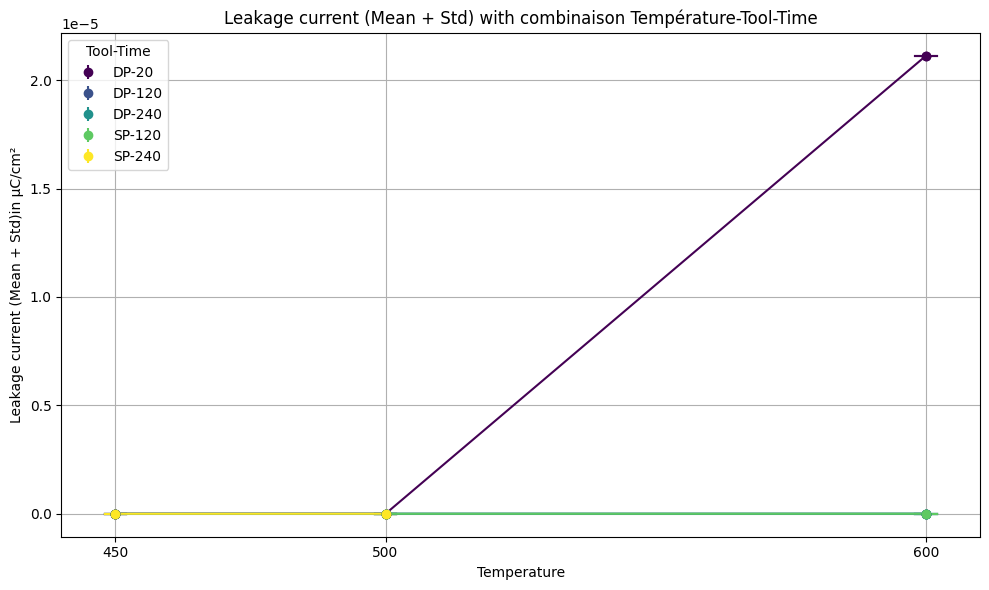

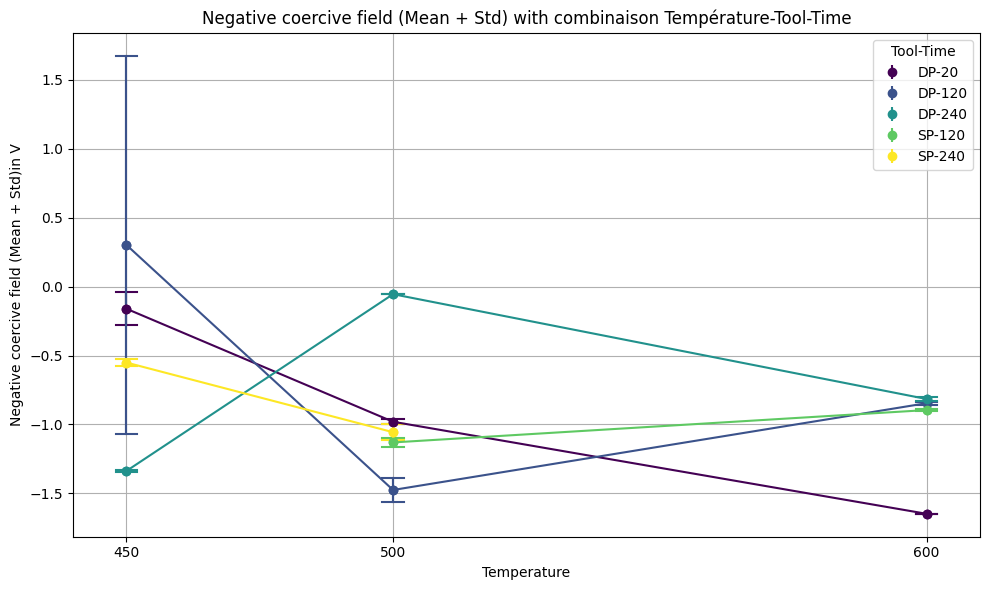

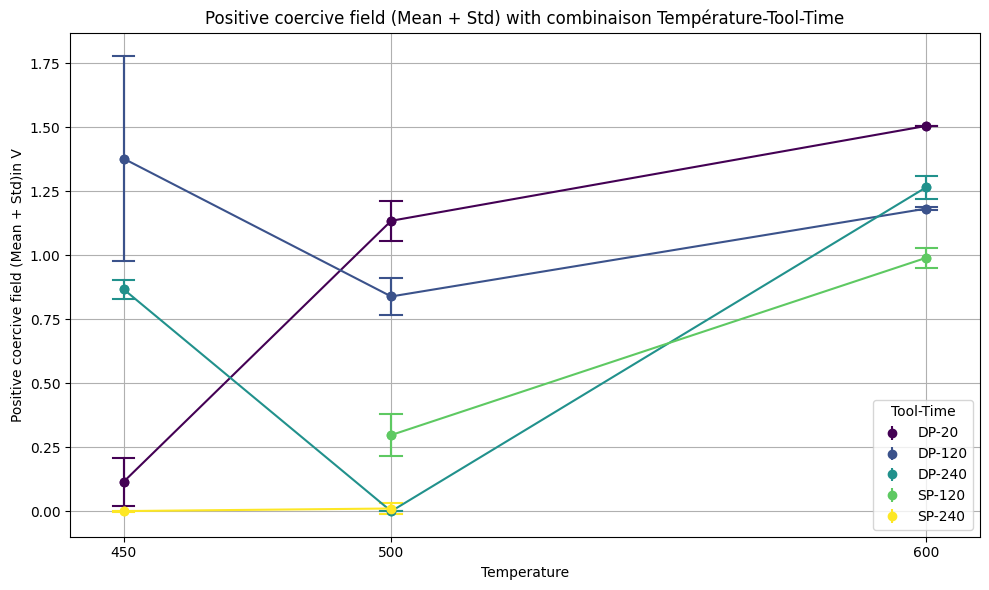

In [30]:
list_wanted = ["res_leak", "res_pol", "res_co"]
temper = ["600", "500", "450"]
tool = ["DP", "SP"]
time = ["20", "120", "240"]

for want in list_wanted:
    if want == "res_leak":
        text = "Leakage current"
        unity = "μC/cm²"
    if want == "res_pol":
        #text = "Polarisation"
        #unity = "A"
        text = "Negative coercive field"
        unity = "V"
    if want == "res_co":
        text = "Positive coercive field"
        unity = "V"
    need_data = stockage_data(result_final, want)

    # Couleurs à utiliser pour chaque combinaison température/tool/time
    colors = plt.cm.viridis(np.linspace(0, 1, len(need_data)))

    # Créer le graphique
    plt.figure(figsize=(10, 6))

    # Liste pour stocker les données par type d'expérience
    lines_data = {}

    # Tracer les données de polarisation pour chaque combinaison température/tool/time
    for i, ((tool, time), data) in enumerate(need_data.items()):
        temperature = data['temperature']
        #micro_coulomb par cm^2
        mean = data['mean']
        std = data['std']
        color = colors[i]
        label = f"{tool}-{time}"  # Création de la légende avec le tool et le time

        # Plot des points de polarisation
        plt.errorbar(temperature, mean, yerr=std, fmt='o', color=color, label=label)

        # Plot des barres d'erreur pour le std
        for temp, m, s in zip(temperature, mean, std):
            plt.plot([temp, temp], [m - s, m + s], color=color)
            plt.plot([temp - 2, temp + 2], [m - s, m - s], color=color)  # Barre gauche
            plt.plot([temp - 2, temp + 2], [m + s, m + s], color=color)  # Barre droite

        # Ajouter la couleur au dictionnaire lines_data
        data['color'] = color

        # Ajouter les données au dictionnaire lines_data
        if (tool, time) not in lines_data:
            lines_data[(tool, time)] = {'temperature': [], 'mean': [], 'color': color}  # Ajouter la couleur
        lines_data[(tool, time)]['temperature'].extend(temperature)
        lines_data[(tool, time)]['mean'].extend(mean)   

    # Tracer les lignes reliant les points de même type d'expérience
    for data in lines_data.values():
        temperature = data['temperature']
        mean = data['mean']
        color = data['color']  # Récupérer la couleur
        plt.plot(temperature, mean, marker='o', linestyle='-', color=color)

    # Configuration de l'axe x
    # Convertir les valeurs de la liste temperature en entiers
    temperature_int = [int(temp) for temp in temper]
    plt.xticks(temperature_int)
    plt.xlabel('Temperature')
    plt.xlim(min(temperature_int) - 10, max(temperature_int) + 10)    # Limite de l'axe x pour être plus centré et inclure les températures 450 et 600

    # Configuration de l'axe y
    plt.ylabel(f'{text} (Mean + Std)in {unity}')

    # Ajout de la légende
    plt.legend(title='Tool-Time')

    # Affichage du graphique
    plt.title(f'{text} (Mean + Std) with combinaison Température-Tool-Time')
    plt.grid(True)
    plt.tight_layout()  # Pour améliorer l'espacement des éléments du plot
    plt.savefig(os.path.join(output_folder, f"{text}_all.png"))
    plt.show()